In [1]:
%%capture
cd ../..

## Gathering Reading from Spreadsheet:

In [2]:
# import factory from residual package
from geomagio.residual import SpreadsheetAbsolutesFactory

In [3]:
# initialize factory
saf = SpreadsheetAbsolutesFactory()

In [4]:
# get reading via spreadsheet parsing
reading = saf.parse_spreadsheet(path="etc/residual/DED-20140952332.xlsm")

## Gathering Readings from Web Absolutes

In [5]:
# import web absolutes factory from residual package
from geomagio.residual import WebAbsolutesFactory
# import UTCDateTime from obspy for time interpretation
from obspy.core import UTCDateTime

In [6]:
# initialize factory
waf = WebAbsolutesFactory()

In [7]:
# specify required observatory, starttime, and endtime
observatory = "BOU"
starttime = UTCDateTime("2020-01-01T00:00:00Z")
endtime = UTCDateTime("2020-07-01T00:00:00Z")

readings = waf.get_readings(observatory=observatory, starttime=starttime, endtime=endtime)

It should be noted that the get_readings tool has the optional parameter include_measurements that is turned off by default. To get readings with field measurements, users should change this parameter to True.

In [8]:
readings = waf.get_readings(observatory=observatory, starttime=starttime, endtime=endtime, include_measurements=True)

## Calculation from Reading

In [9]:
# import calculation method from residual package
from geomagio.residual.Calculation import calculate

In [10]:
# perform calculation with reading from spreadsheet factory
output_reading = calculate(reading)

## Method Validation

The residual method utilizes fundamental theories from the null method with slight improvements via small angle approximations. Resulting calculations should only vary slightly from original values.

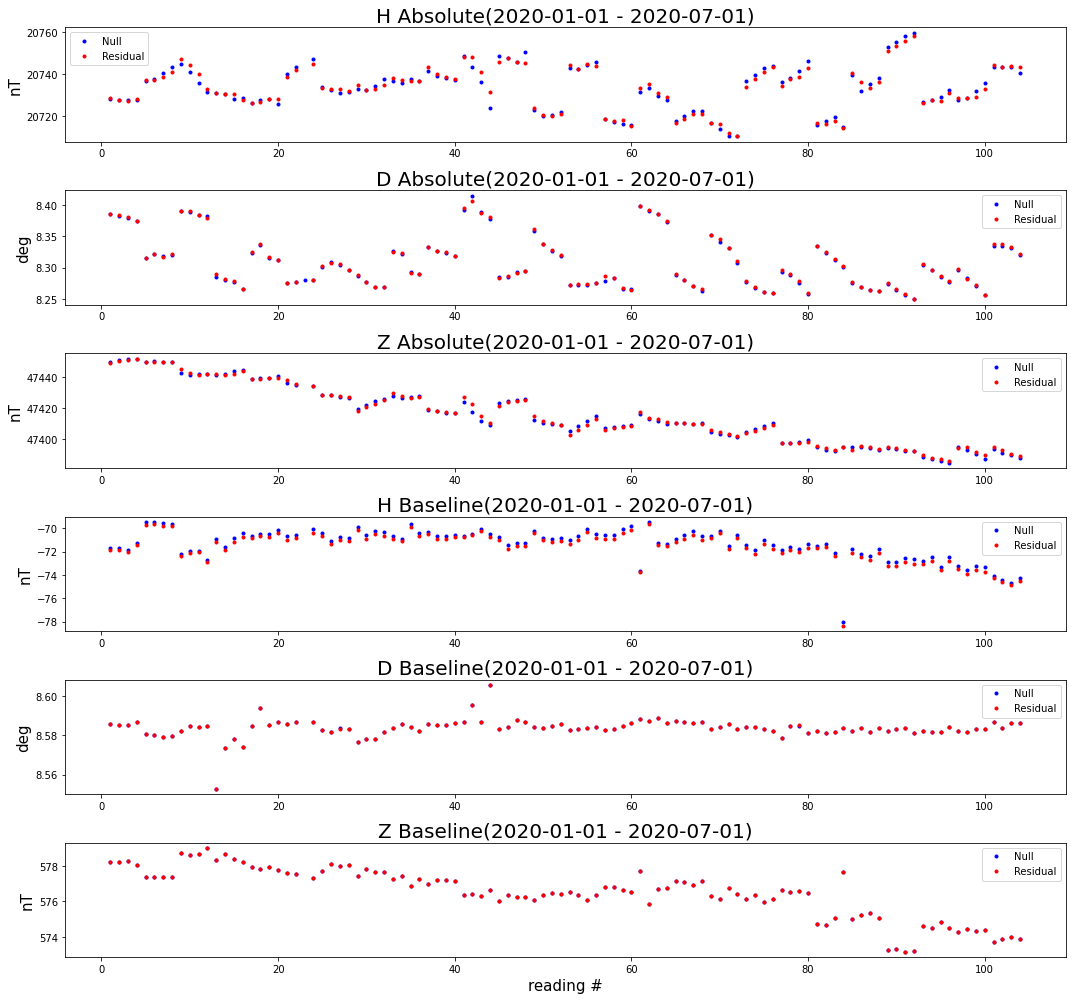

In [11]:
%run 'docs/residual/validation_plots.py'